<a href="https://colab.research.google.com/github/MahalakshmiDSML/Final-Project/blob/main/S_Mahalakshmi_Final_Project_Retail_Fashion_Boutique_Data_Sales_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Retail Fashion Boutique Data Sales Analytics**

##**Problem Statement: Predicting Final Selling Price (Current Price) Using Retail Product Attributes**

**In the competitive fashion retail industry, pricing optimization is a critical component of revenue management and inventory turnover. Retailers frequently apply markdowns based on a variety of factors such as brand, seasonality product category, and initial pricing strategy. Understanding how these factors influence the final selling price (i.e., current_price) can help in dynamically adjusting prices to optimize sales and margins.**


##**Objective:**

**To build a Linear Regression model that predicts the current_price of fashion retail products based on multiple product and business-related attributes. This predictive model aims to assist retailers in making informed decisions about discount strategies and price adjustments.**

#**Stage 1**

## **Dataset Selection with intial EDA**

###**Source / Timeline / Location**

###Kagggle/2025/Not Specified

### **Type of Problem**
**Regression / Classification**

**Regression**

## **Possible algorithms planned to use**

**Linear Regression**

**Decision Trees**

**K-Nearest  Neighbors (KNN)**

**Randon Forest Algorithm**

**Support Vector Machines(SVM)---SVR**

## **Dataset Description**

##**All Features Description**

**product_id**
- Unique product identifier (FB000001-FB002176)

**category**    
- Product type (Dresses, Tops, Bottoms, Outerwear, Shoes, Accessories)

**brand**  
- Fashion brand name (Zara, H&M, Forever21, Mango, Uniqlo, Gap, Banana Republic, Ann Taylor)

**season**
-  Collection season (Spring, Summer, Fall, Winter)

**size**
-  Clothing size (XS, S, M, L, XL, XXL)

**color**
-  Product color (Black, White, Navy, Gray, Beige, Red, Blue, Green, Pink, Brown, Purple)

**original_price**
-  Base product price ( 15.14 − 249.98)

**markdown_percentage**
- Discount percentage (0% - 59.9%)

**current_price**
- Final selling price after discounts

**purchase_date**
-  Transaction date (2024-2025 range)

**stock_quantity**
-  Available inventory (0-50 units)

**customer_rating**
- Product rating (1.0-5.0 scale) - Includes nulls
  
**is_returned**
- Return status (True/False)

**return_reason**
- Specific return reason (Size Issue, Quality Issue, Color Mismatch, Damaged, Changed Mind, Wrong Item)

## **Sample Outcome**

**Target Feature - current_price**

**Input Features - (category,brand,season,size,color,markdown_percentage,original_price)**

**Not needed for Prediction- (product_id,purchase_date,stock_quantity,is_returned,return_reason,customer_rating)**

### **Sample output**

**category,brand,season,size,color,markdown_percentage,original_price --> Predicted current_price**

## **Initial EDA**

**Read the data from Github - raw link**

**info**

**describe**

**null values**

**duplicates**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/MahalakshmiDSML/Final-Project/refs/heads/main/fashion_boutique_dataset.csv')
df.head()

,product_id,category,brand,season,size,color,original_price,markdown_percentage,current_price,purchase_date,stock_quantity,customer_rating,is_returned,return_reason
0,FB000001,Outerwear,Zara,Spring,XL,Red,196.01,0.0,196.01,2025-07-05,37,3.0,False,NaN
1,FB000002,Tops,Uniqlo,Winter,L,Pink,119.64,0.0,119.64,2025-08-06,2,2.5,False,NaN
2,FB000003,Accessories,Uniqlo,Winter,NaN,Black,33.80,0.0,33.80,2025-08-06,22,4.3,False,NaN
3,FB000004,Shoes,Uniqlo,Spring,XL,Black,75.36,0.0,75.36,2025-07-07,48,2.6,False,NaN
4,FB000005,Tops,Banana Republic,Winter,XL,Black,105.02,0.0,105.02,2025-08-06,10,NaN,False,NaN


**df.head() --> Show first 5 rows.**

In [ ]:
df.tail()    # Show Lasr five Rows

,product_id,category,brand,season,size,color,original_price,markdown_percentage,current_price,purchase_date,stock_quantity,customer_rating,is_returned,return_reason
2171,FB002172,Tops,Mango,Summer,XL,Black,31.41,0.0,31.41,2025-08-06,10,2.1,False,NaN
2172,FB002173,Dresses,Banana Republic,Winter,L,Brown,50.58,0.0,50.58,2025-08-06,1,3.1,True,Changed Mind
2173,FB002174,Accessories,Banana Republic,Winter,NaN,Beige,79.37,54.8,35.88,2025-08-06,40,2.6,False,NaN
2174,FB002175,Bottoms,Ann Taylor,Summer,XL,Pink,105.52,0.0,105.52,2025-08-06,20,4.9,True,Size Issue
2175,FB002176,Shoes,Ann Taylor,Summer,XXL,White,154.02,0.0,154.02,2025-08-06,23,1.3,False,NaN


In [ ]:
df.shape

(2176, 14)

###**Summary :**
**df.shape  -->Show total no of Rows & Features(2176 Rows, 14 Features)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           2176 non-null   object 
 1   category             2176 non-null   object 
 2   brand                2176 non-null   object 
 3   season               2176 non-null   object 
 4   size                 1685 non-null   object 
 5   color                2176 non-null   object 
 6   original_price       2176 non-null   float64
 7   markdown_percentage  2176 non-null   float64
 8   current_price        2176 non-null   float64
 9   purchase_date        2176 non-null   object 
 10  stock_quantity       2176 non-null   int64  
 11  customer_rating      1814 non-null   float64
 12  is_returned          2176 non-null   bool   
 13  return_reason        320 non-null    object 
dtypes: bool(1), float64(4), int64(1), object(8)
memory usage: 223.3+ KB



###**Summary:**
**df.info--->Show Total no of rows & columns and Data types, Non-Null values also.**

  **8 Features- Object Datatypes**

 **4 Features- Float Datatypes**

  **1 Features- Bool Datatypes**
  
  **1 Features- Int Datatypes**


In [ ]:
df.describe()

,original_price,markdown_percentage,current_price,stock_quantity,customer_rating
count,2176.000000,2176.000000,2176.000000,2176.000000,1814.000000
mean,97.200340,12.144715,85.499596,24.937960,2.986604
std,51.637345,18.417786,50.091354,14.451387,1.159722
min,15.140000,0.000000,7.290000,0.000000,1.000000
25%,57.872500,0.000000,46.845000,13.000000,2.000000
50%,88.600000,0.000000,74.885000,25.000000,3.000000
75%,127.630000,22.425000,112.865000,37.000000,4.000000
max,249.980000,59.900000,249.980000,50.000000,5.000000


###**Summary:**
**df.describe()---> Show All Numeric Features count, Mean, Min, Max, Std,25%,50%,75%.**

**Total Count of Rows---2176**

**Mean of Original_price---97.200**

**Maximum of Stock_Quantity--50**

**Minimum of Customer_Rating---1.0**





In [ ]:
df.isna().sum()

,0
product_id,0
category,0
brand,0
season,0
size,0
color,0
original_price,0
markdown_percentage,0
current_price,0
purchase_date,0


In [ ]:
nullcount=df.isnull().sum()
nullcount[nullcount>0]

,0


###**Summary:**
**To Show Null count of this Three columns.**

  **(size-491),(customer_rating-362),(return_reason-1856)**


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
2171,False
2172,False
2173,False
2174,False


In [ ]:
df.duplicated().sum()    # Show duplicate row count

np.int64(0)

In [ ]:
df[df.duplicated()]   # Show duplicate Rows.

,product_id,category,brand,season,size,color,original_price,markdown_percentage,current_price,purchase_date,stock_quantity,customer_rating,is_returned,return_reason


###**Summary:**
**No duplicates values.**


##**Observation:**

**Toal No.of Rows&Columns:(2176 Rows & 14 Features)**

**In this datatype has--> 8-Object (Dtypes),1-Bool(Dtypes),4-Float(Dtypes),1-(int Dtypes)**

**In this datatypes has Missing values.And the column is Size(491),Customer_Rating(362),Return_reason(1856)**

**No duplicates values here.**


#**Stage 2:**

## **Handling missing values**

In [ ]:
nullcount

,0
product_id,0
category,0
brand,0
season,0
size,0
color,0
original_price,0
markdown_percentage,0
current_price,0
purchase_date,0


In [ ]:
df['size'].value_counts(dropna=False)

,count
size,
XS,792
S,294
XL,283
XXL,279
L,273
M,255


In [ ]:
df['customer_rating'].nunique()     # to show total count Unique values.

42

In [ ]:
df['customer_rating'].unique()    # Show unique values.

array([3.        , 2.5       , 4.3       , 2.6       , 2.98660419,
       2.9       , 1.6       , 4.4       , 3.4       , 1.7       ,
       2.4       , 4.6       , 3.5       , 4.1       , 3.7       ,
       1.2       , 3.6       , 1.1       , 3.8       , 1.5       ,
       4.9       , 4.        , 3.3       , 2.8       , 1.8       ,
       4.5       , 4.2       , 3.9       , 2.3       , 1.4       ,
       1.9       , 3.1       , 1.3       , 1.        , 4.8       ,
       4.7       , 3.2       , 2.1       , 5.        , 2.        ,
       2.7       , 2.2       ])

In [ ]:
df['is_returned'].value_counts(dropna=False)

,count
is_returned,
False,1856
True,320


In [ ]:
df['is_returned'].unique()

array([False,  True])

In [ ]:
df['return_reason'].nunique()

7

In [ ]:
df['return_reason'].unique()

array(['Not Return', 'Color Mismatch', 'Size Issue', 'Damaged',
       'Quality Issue', 'Changed Mind', 'Wrong Item'], dtype=object)

In [ ]:
df['return_reason'].value_counts(dropna=False).head(1)   # dropna=False -->Include missing values in the count (show how many missing values in the column.)

,count
return_reason,
Not Return,1856


In [ ]:
df['return_reason'].value_counts(dropna=False)

,count
return_reason,
Not Return,1856
Changed Mind,68
Size Issue,60
Quality Issue,55
Wrong Item,47
Color Mismatch,46
Damaged,44


In [ ]:
df['size'].mode()[0]

'XS'

In [ ]:
df['return_reason'].mode()[0]

'Not Return'

In [ ]:
df['customer_rating'].mean()

np.float64(2.986604189636163)

**To impute mean value for Numeric column & impute mode value for categorical column.**

In [ ]:
df['size']=df['size'].fillna(df['size'].mode()[0])

In [ ]:
df['customer_rating']=df['customer_rating'].fillna(df['customer_rating'].mean())

In [ ]:
df.loc[df['is_returned'] == False, 'return_reason'] = 'Not Return'

In [ ]:
df.isna().sum()

,0
product_id,0
category,0
brand,0
season,0
size,0
color,0
original_price,0
markdown_percentage,0
current_price,0
purchase_date,0


**Summary: Now Missing values are imputed.**

##**Handle Outliers:**

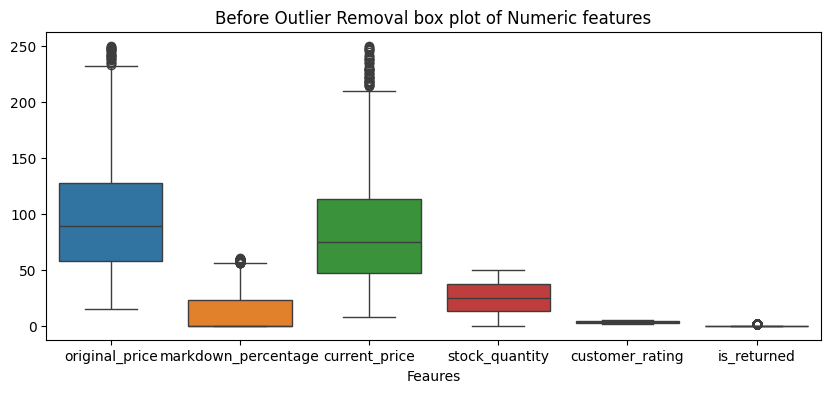

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df)
plt.title("Before Outlier Removal box plot of Numeric features")
plt.xlabel("Feaures")
plt.show()

###**Interpretation:**
**In this chart we can see some outliers in three Features.**

###**Handle Outliers:**

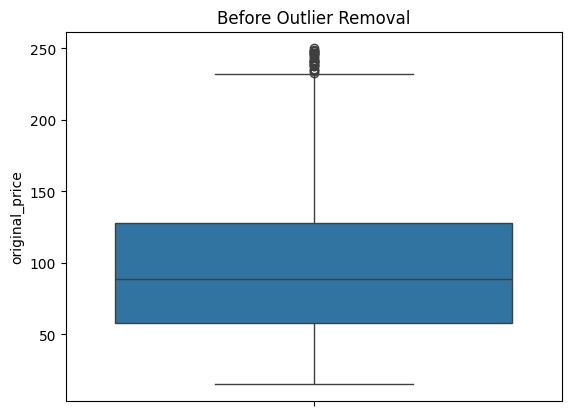

In [ ]:
sns.boxplot(data=df['original_price'])
plt.title("Before Outlier Removal")
plt.show()

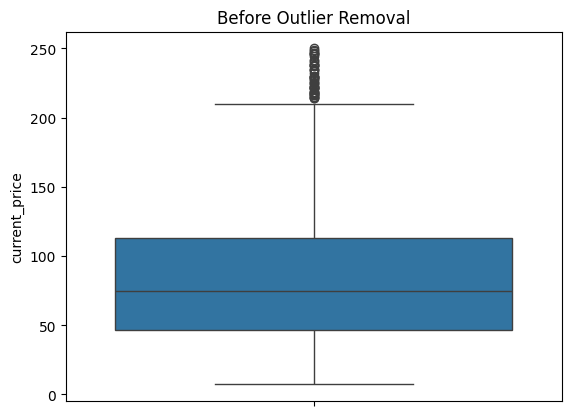

In [ ]:
sns.boxplot(data=df['current_price'])
plt.title("Before Outlier Removal")
plt.show()

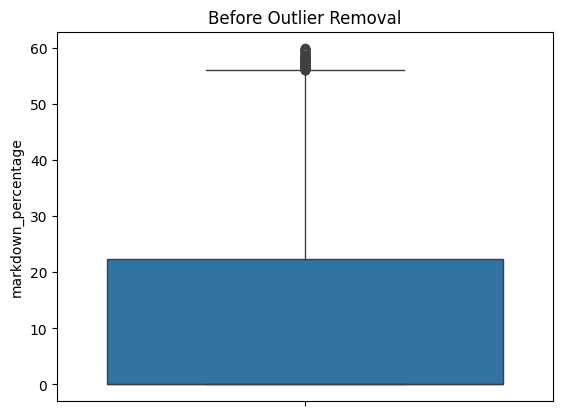

In [ ]:
sns.boxplot(data=df['markdown_percentage'])
plt.title("Before Outlier Removal")
plt.show()

In [ ]:
def remove_outliers(df,columns):
  for col in columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3-q1
    lower_bound=q1-1.5*IQR
    upper_bound=q3+1.5*IQR
    df=df[(df[col]>=lower_bound)&(df[col]<=upper_bound)]
    return df

In [ ]:
df.shape

(2176, 14)

In [ ]:
newdf=remove_outliers(df,['original_price'])
newdf.shape

(2150, 14)

In [ ]:
df1=remove_outliers(newdf,['current_price'])
df1.shape

(2115, 14)

In [ ]:
df2=remove_outliers(df1,['markdown_percentage'])
df2.shape

(2079, 14)

In [ ]:
df.shape

(2176, 14)

In [ ]:
df2.shape

(2079, 14)

In [ ]:
2176-2079

97

###**Outliers:**
97 data points are outliers.

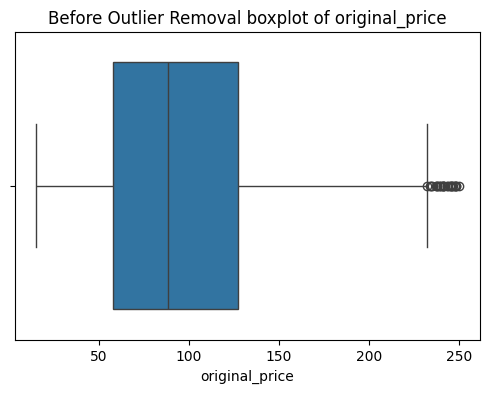

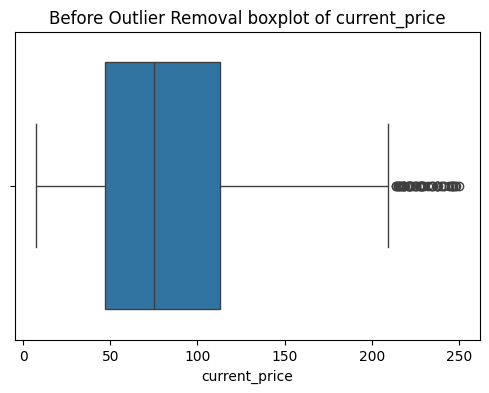

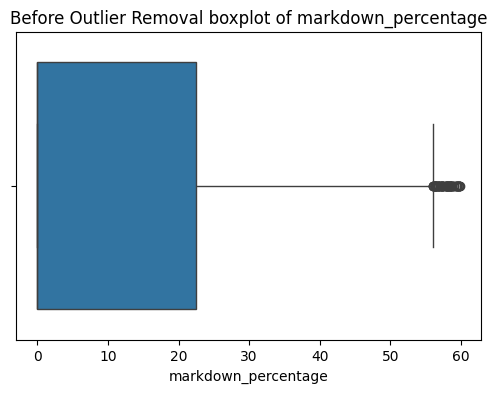

In [ ]:
column=['original_price','current_price','markdown_percentage']
for col in column:
  plt.figure(figsize=(6,4))
  sns.boxplot(x=df[col])
  plt.title(f'Before Outlier Removal boxplot of {col}')
  plt.show()

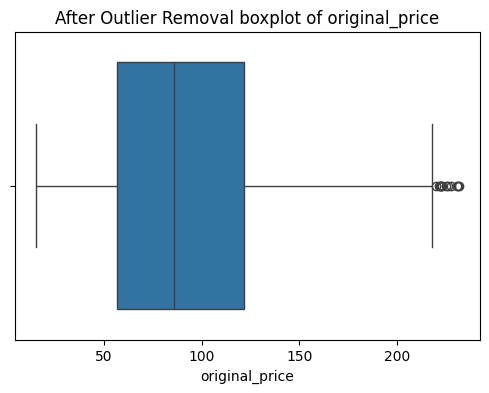

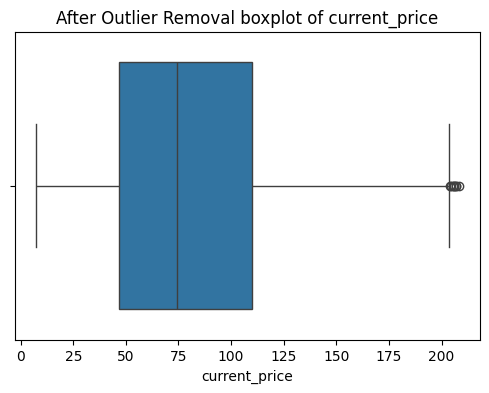

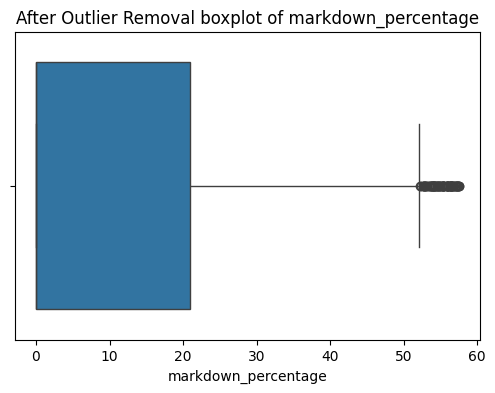

In [ ]:
column=['original_price','current_price','markdown_percentage']
for col in column:
  plt.figure(figsize=(6,4))
  sns.boxplot(x=df2[col])
  plt.title(f'After Outlier Removal boxplot of {col}')
  plt.show()

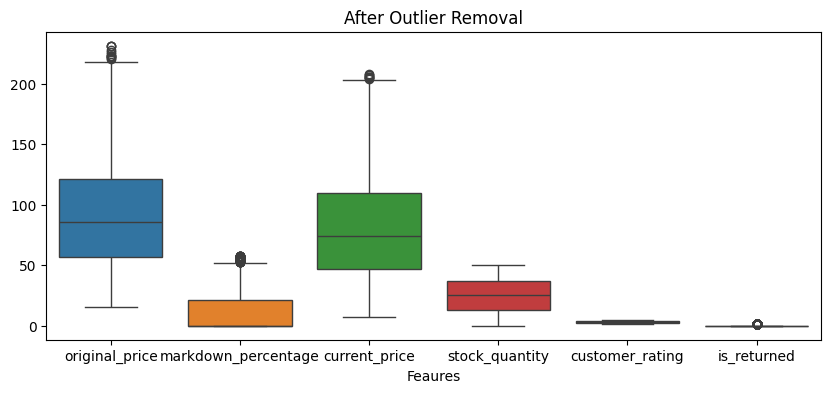

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df2)
plt.title("After Outlier Removal")
plt.xlabel("Feaures")
plt.show()

###**Interpretation:**
**In this chart we can see the differene between before & after outlier removal.**

##**Handle Skewness:**

In [ ]:
import plotly.figure_factory as ff
fig=ff.create_distplot([df2['original_price']],['Starting Price with no Discount'],show_hist=False)
fig.show()

In [ ]:
sscore=df2['original_price'].skew()
sscore

np.float64(0.5665871604868619)

In [ ]:
import plotly.figure_factory as ff
fig1=ff.create_distplot([df2['current_price']],['Current Price with Discount'],show_hist=False)
fig1.show()

In [ ]:
sscore1=df2['current_price'].skew()
sscore1

np.float64(0.671731387720607)

In [ ]:
import plotly.figure_factory as ff
fig2=ff.create_distplot([df2['markdown_percentage']],['Discount'],show_hist=False)
fig2.show()

In [ ]:
sscore2=df2['markdown_percentage'].skew()
sscore2

np.float64(1.2698086354162106)

###**Summary:**
 **In this above chart we can see some skewness here. to rectify with Squared.**

**0 --> Skewness Perfect data**.

**0.5 -->(-0.5) Mild Skewness ignore it .**

**But this data set feature has 0.59,0.6,1.2 for three feature Skewness score.**

In [ ]:
# Solution for Skewness Handle
squard=df2['original_price']**0.5
ss1=squard.skew()
ss1

np.float64(0.07384895883904656)

In [ ]:
squard1=df2['current_price']**0.5
ss2=squard1.skew()
ss2

np.float64(0.15058570453192033)

In [ ]:
squard2=df2['markdown_percentage']**0.5
ss3=squard2.skew()
ss3

np.float64(0.8141909022268579)

In [ ]:
import plotly.figure_factory as ff
fig3=ff.create_distplot([squard],['Starting Price with no Discount'],show_hist=False)
fig3.show()

In [ ]:
import plotly.figure_factory as ff
fig4=ff.create_distplot([squard1],['Current Price with Discount'],show_hist=False)
fig4.show()

In [ ]:
import plotly.figure_factory as ff
fig5=ff.create_distplot([squard2],['Discount'],show_hist=False)
fig5.show()

###**Observation:**
 **Now Skewness score is mild for three features like (0.0,0.1,0.8)**

##**Handle Kurtosis:**

In [ ]:
kscore=df2['original_price'].kurtosis()
kscore

np.float64(-0.40265894178006434)

In [ ]:
kscore1=df2['current_price'].kurtosis()
kscore1

np.float64(-0.28818342671652264)

In [ ]:
kscore2=df2['markdown_percentage'].kurtosis()
kscore2

np.float64(0.1531828225546854)

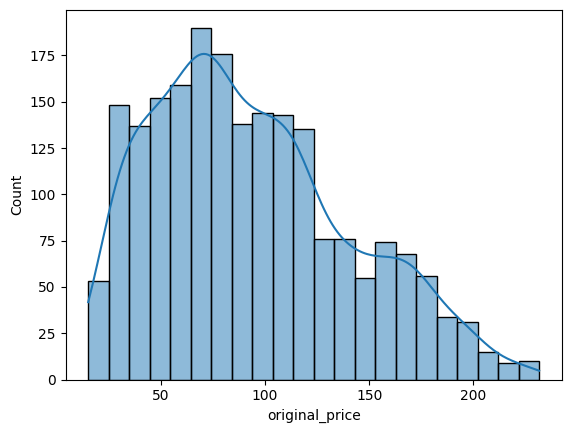

In [ ]:
sns.histplot(df2['original_price'], kde=True)
plt.show()

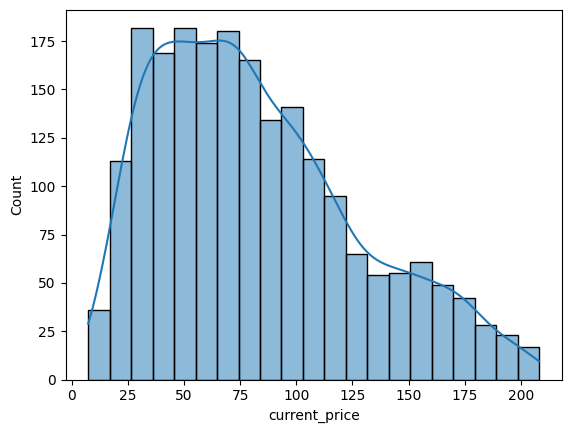

In [ ]:
sns.histplot(df2['current_price'], kde=True)
plt.show()

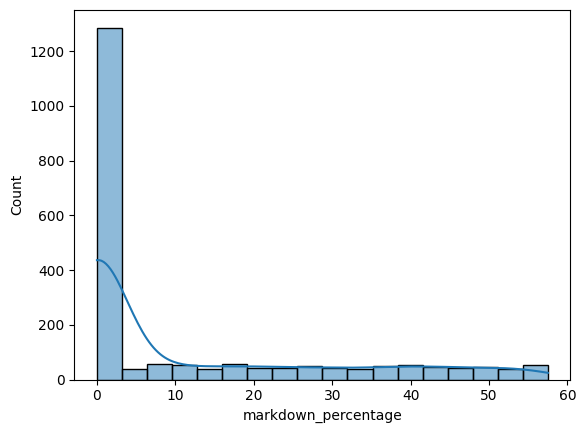

In [ ]:
sns.histplot(df2['markdown_percentage'], kde=True)
plt.show()

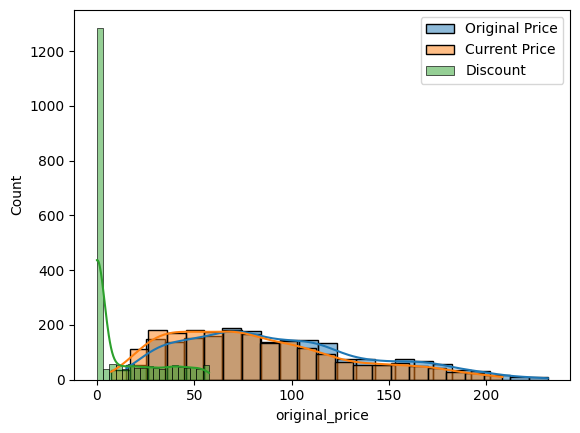

In [ ]:
sns.histplot(df2['original_price'], kde=True,label='Original Price')
sns.histplot(df2['current_price'], kde=True,label='Current Price')
sns.histplot(df2['markdown_percentage'], kde=True,label='Discount')
plt.legend()
plt.show()

###**Summary:**
 **In this above chart to see the kurtosis score is between (0.5 to-0.5) only.**

**original price kurtosis --> (-0.4)**

**Current price -->(-0.2)**

**Diiscount --->(0.1)**
**This is close to 0.so this is normal kurtosis.**

##**Correlation:**

In [ ]:
Numeric_col=df2.select_dtypes(include='number')
df_corr=Numeric_col.corr()
df_corr

,original_price,markdown_percentage,current_price,stock_quantity,customer_rating
original_price,1.000000,0.021338,0.909475,-0.018212,0.003849
markdown_percentage,0.021338,1.000000,-0.352040,0.012313,-0.006531
current_price,0.909475,-0.352040,1.000000,-0.018577,0.000187
stock_quantity,-0.018212,0.012313,-0.018577,1.000000,-0.010062
customer_rating,0.003849,-0.006531,0.000187,-0.010062,1.000000


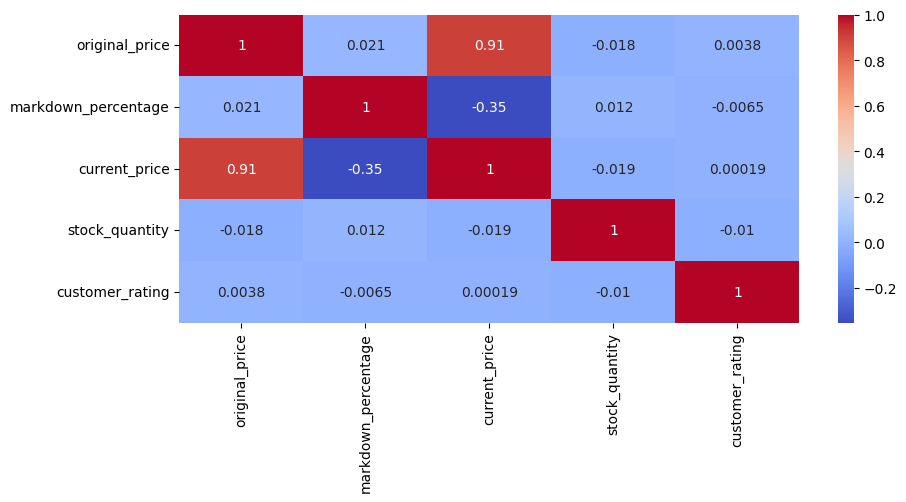

In [ ]:
plt.figure(figsize=(10,4))
sns.heatmap(df_corr,annot=True,cmap='coolwarm')
plt.show()

In [ ]:
df_corr.shape

(5, 5)

In [ ]:
target_corr=df_corr['current_price']
target_corr

,current_price
original_price,0.909475
markdown_percentage,-0.352040
current_price,1.000000
stock_quantity,-0.018577
customer_rating,0.000187


###**Interpretation:**
 **In this above chart to see the correlation between target & input features.**

 **Strong Positive correlation--> (original_price--0.909475)**

 **Weak Positive correlation-->(markdown_percentage	-0.352040),(stock_quantity	-0.018577)**


##**Visualization:**

In [ ]:
df.columns

Index(['product_id', 'category', 'brand', 'season', 'size', 'color',
       'original_price', 'markdown_percentage', 'current_price',
       'purchase_date', 'stock_quantity', 'customer_rating', 'is_returned',
       'return_reason'],
      dtype='object')

##**Exploratory Data Analysis(EDA) and Visualization:**
###**1.The Relationship between current_price and original_price**

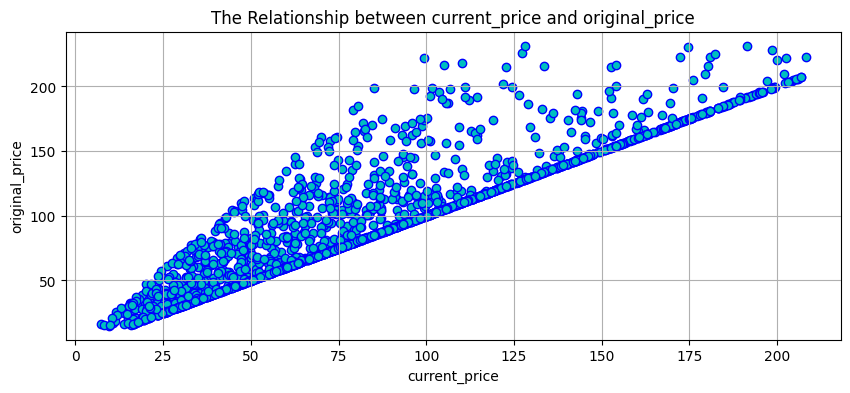

In [ ]:

plt.figure(figsize=(10,4))
plt.scatter(df2['current_price'],df2['original_price'],color='c',edgecolors='b')
plt.title("The Relationship between current_price and original_price")
plt.xlabel("current_price")
plt.ylabel("original_price")
plt.grid(True)
plt.show()

###**Interpretation:**
  **In this chart we can see original_price increase also increase current_price.**
 **To see the positive correlation. We can see Majority original_price is below 100.**

In [ ]:
gdata=df2.groupby(['brand','category'])['current_price'].mean().sort_values().reset_index()
gdata

,brand,category,current_price
0,Forever21,Accessories,39.560566
1,Banana Republic,Accessories,41.206000
2,Ann Taylor,Accessories,42.634783
3,Zara,Accessories,43.385484
4,H&M,Accessories,43.540976
5,Uniqlo,Accessories,44.512759
6,Gap,Accessories,46.706078
7,Mango,Accessories,47.272045
8,Gap,Bottoms,57.293333
9,Ann Taylor,Bottoms,58.775526


###**2.Average Distribution of current price by Brand and Category**

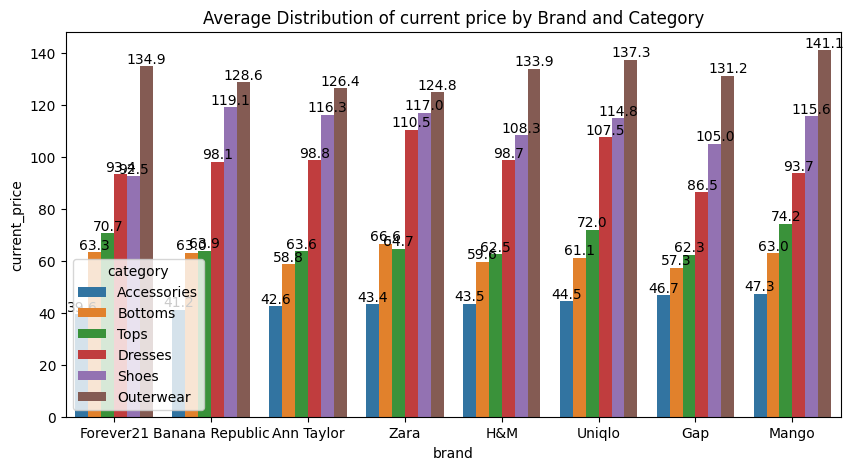

In [ ]:
plt.figure(figsize=(10,5))
bars=sns.barplot(data=gdata,x='brand',y='current_price',hue='category')
for container in bars.containers:
  bars.bar_label(container,fmt='%.1f')
plt.title("Average Distribution of current price by Brand and Category")
plt.xlabel("brand")
plt.legend(title='category',loc='lower left')
plt.ylabel("current_price")
plt.show()

###**Interpretation:**
 **In this chart we can see the average distribution of current price.The highest average price outerwear,shoes for all brand. Average price between 40 to 141 only for all brand & category.**

In [ ]:
gdata1=df2.groupby(['season','category'])['original_price'].max().sort_values().reset_index()
gdata1

,season,category,original_price
0,Summer,Accessories,79.02
1,Fall,Accessories,79.60
2,Winter,Accessories,79.69
3,Spring,Accessories,79.94
4,Fall,Tops,117.39
5,Summer,Tops,119.04
6,Summer,Bottoms,119.56
7,Fall,Bottoms,119.63
8,Winter,Tops,119.70
9,Spring,Bottoms,119.84


###**3.Maximum Distribution of Original price by Category and Season**

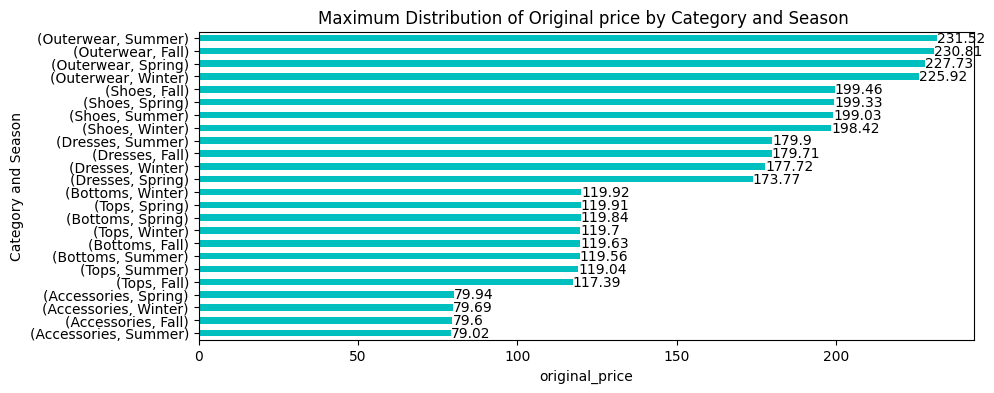

In [ ]:
gdata1=df2.groupby(['category','season'])['original_price'].max().sort_values().plot(kind='barh',figsize=(10,4),color='c')
gdata1.bar_label(gdata1.containers[0])
plt.title("Maximum Distribution of Original price by Category and Season ")
plt.xlabel("original_price")
plt.ylabel("Category and Season")
plt.show()

###**Interpretation:**
**In this chart we can see the maximum distribution of original price.The maximum price is outwear in all season,Lower price for Accessories.And the price between above 75 to below 235.**


In [ ]:
gdata2=df2.groupby(['season','size'])['markdown_percentage'].max().sort_values().reset_index()
gdata2

,season,size,markdown_percentage
0,Spring,XL,53.5
1,Fall,S,53.7
2,Spring,XS,54.7
3,Winter,L,54.8
4,Winter,XS,54.8
5,Winter,XL,55.0
6,Fall,XL,55.3
7,Summer,XXL,55.4
8,Spring,S,55.9
9,Fall,XXL,56.1


###**4.Maximum Distribution of markdown_percentage by season and size**

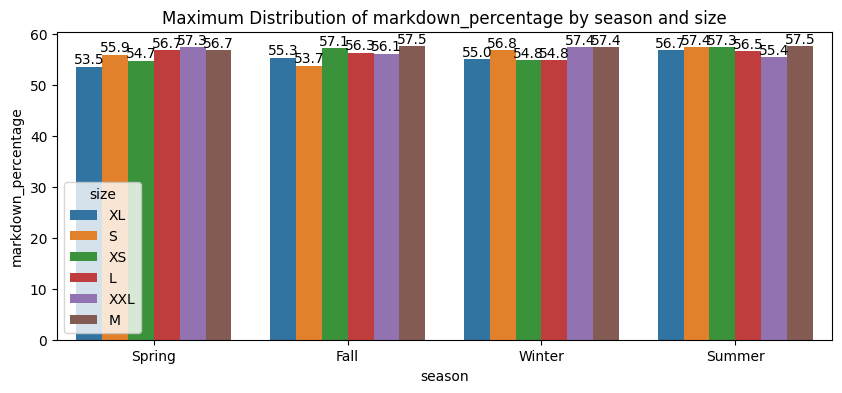

In [ ]:
plt.figure(figsize=(10,4))
bars1=sns.barplot(data=gdata2,x='season',y='markdown_percentage',hue='size')
for container in bars1.containers:
  bars1.bar_label(container,fmt='%.1f')
plt.title("Maximum Distribution of markdown_percentage by season and size")
plt.xlabel("season")
plt.legend(title='size',loc='lower left')
plt.ylabel("markdown_percentage")
plt.show()

###**Interpretation:**
 **In this chart we can see the maximum discount of size & season.maximum discount between 50 to 57% for all season and size.**

###**5.The Distribution of original_price by season**

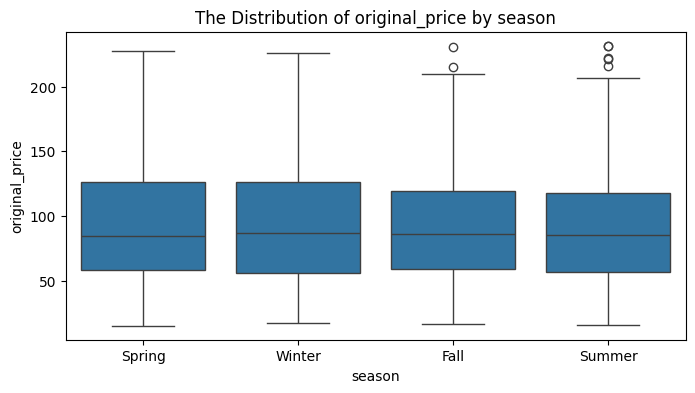

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df2, x='season', y='original_price')
plt.title("The Distribution of original_price by season")
plt.xlabel("season")
plt.ylabel("original_price")
plt.show()

###**Interpretation:**
 **In this chart we can see the some outliers, but also solve the outliers. Season of original_price between above 50 to below 150.All are same the ratio.**

In [ ]:
gdata3=df2.groupby('category')['original_price'].mean().sort_values()
gdata3

,original_price
category,
Accessories,48.852582
Bottoms,70.896373
Tops,74.144423
Dresses,112.614586
Shoes,127.423912
Outerwear,148.966579


###**6.Average Distribution of Category**

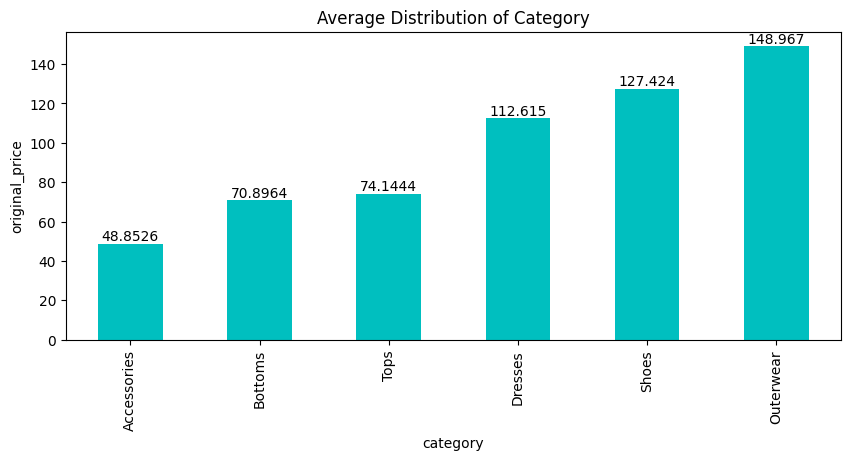

In [ ]:
bars2=df2.groupby('category')['original_price'].mean().sort_values().plot(kind='bar',figsize=(10,4),color='c')
bars2.bar_label(bars2.containers[0])
plt.title('Average Distribution of Category')
plt.xlabel('category')
plt.ylabel('original_price')
plt.show()

###**Interpretation:**
**In this chart we can see the Average of starting price without no discount.To see average price is above 48 to below 148.The highest average price is outwear & lowest average price is Accesssories.**

In [ ]:
gdata4=df2.groupby('return_reason')['return_reason'].value_counts().sort_values()
gdata4

,count
return_reason,
Damaged,43
Color Mismatch,45
Wrong Item,46
Quality Issue,54
Size Issue,55
Changed Mind,63
Not Return,1773


###**7.Distribution of Return Reason**

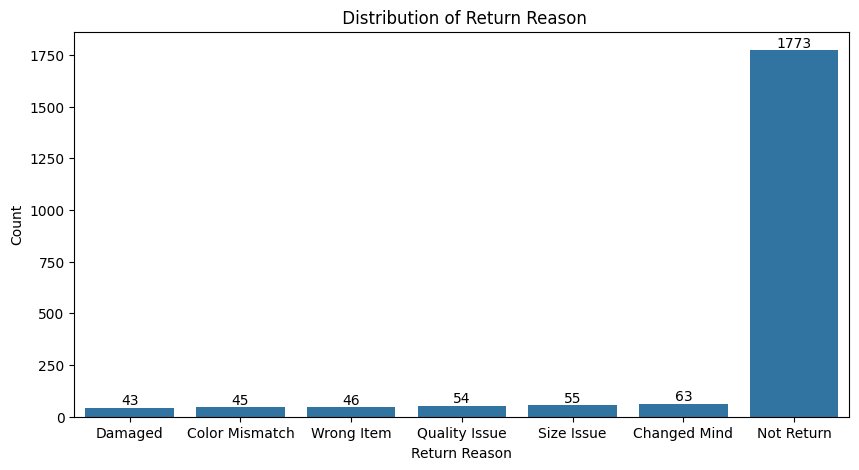

In [ ]:
plt.figure(figsize=(10,5))
bars3=sns.countplot(data=df2, x='return_reason',order=df2['return_reason'].value_counts().sort_values().index)
for container in bars3.containers:
  bars3.bar_label(container)
plt.title(" Distribution of Return Reason")
plt.xlabel("Return Reason")
plt.ylabel("Count")
plt.show()

###**Interpretation:**
 **In this chart we can see Return reason of count.The highest is change my mind & Quality issue. Not return means the product is not return by the buyers.**

In [ ]:
gdata5=df2.groupby(['size','color'])['stock_quantity'].max().sort_values()
gdata5

size  color
S     Beige    38
L     Green    42
M     Navy     43
      Beige    44
      Green    44
               ..
XXL   Blue     50
      Brown    50
XL    Black    50
XXL   Navy     50
      Red      50
Name: stock_quantity, Length: 66, dtype: int64

###**8.Maximum Stock Quantity of stock_quantity by size & color**

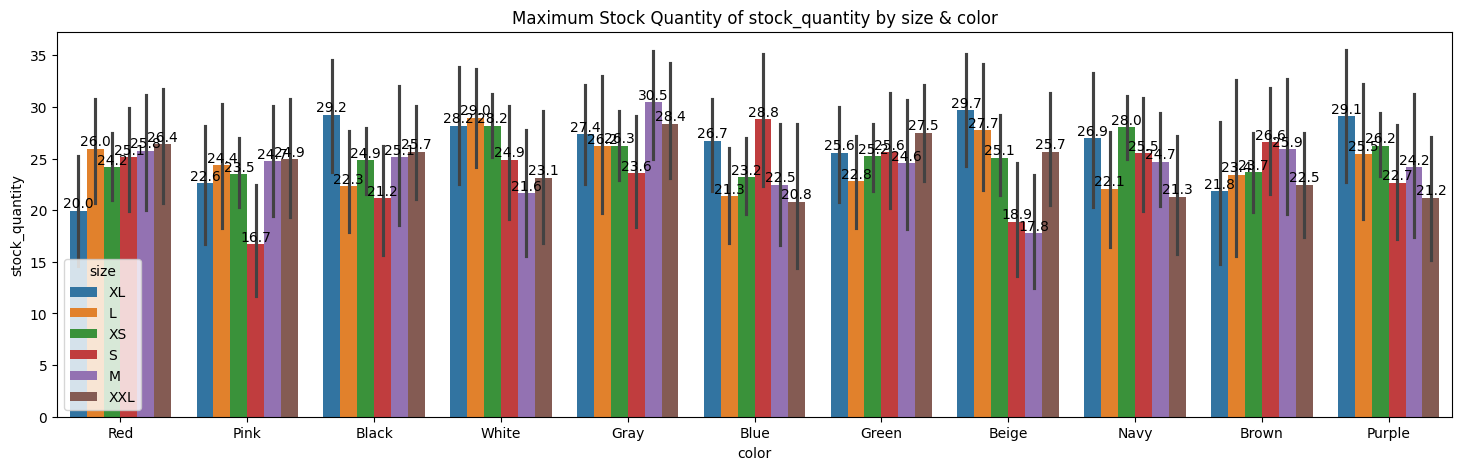

In [ ]:
plt.figure(figsize=(18,5))
bars4=sns.barplot(data=df2,x='color',y='stock_quantity',hue='size')
for container in bars4.containers:
 bars4.bar_label(container,fmt='%.1f')
plt.title('Maximum Stock Quantity of stock_quantity by size & color')
plt.xlabel('color')
plt.ylabel('stock_quantity')
plt.legend(title='size',loc='lower left')
plt.show()

###**Interpretation:**
 **In this chart we can see the Maximum stock quantity between 16 to below 30.**

In [ ]:
gdata6=df2.groupby(['size','season'])['markdown_percentage'].mean().sort_values()
gdata6

size  season
L     Fall       8.428070
      Winter     8.769643
XL    Winter     8.786957
L     Spring    10.008219
XXL   Summer    10.260000
M     Winter    10.655357
XS    Spring    10.885326
      Summer    10.984699
S     Fall      11.024590
XS    Winter    11.132984
L     Summer    11.315068
M     Summer    11.320635
S     Spring    11.472500
M     Spring    11.697826
XL    Spring    12.106329
      Summer    12.174286
XS    Fall      12.223786
XL    Fall      12.644643
XXL   Winter    12.723529
M     Fall      13.422973
XXL   Fall      13.787692
      Spring    13.847170
S     Winter    14.278333
      Summer    14.339474
Name: markdown_percentage, dtype: float64

###**9.Average Discount of size & season**

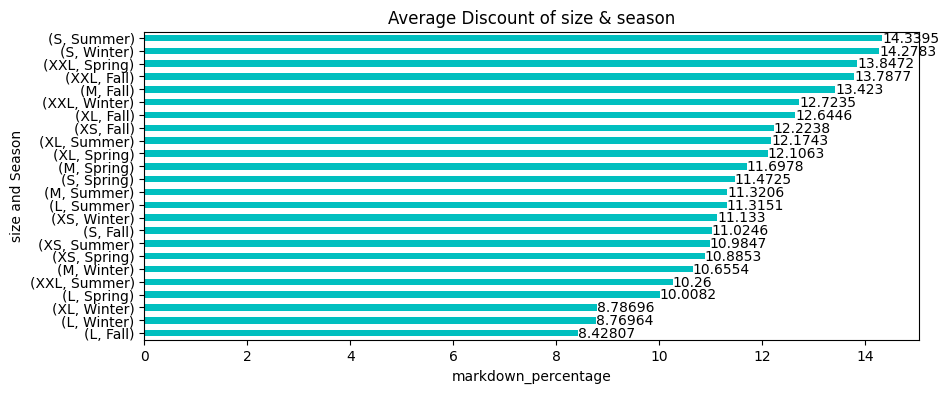

In [ ]:
gdata6=df2.groupby(['size','season'])['markdown_percentage'].mean().sort_values().plot(kind='barh',figsize=(10,4),color='c')
gdata6.bar_label(gdata6.containers[0])
plt.title("Average Discount of size & season")
plt.xlabel("markdown_percentage")
plt.ylabel("size and Season")
plt.show()

###**Interpretation:**
 **In this chart we can see the average discount of season & size.To see highest average discount is 14% and lowest is 8% only.Given higher discount in Summer season.**

###**10.Distribution of original_price by brand & size**


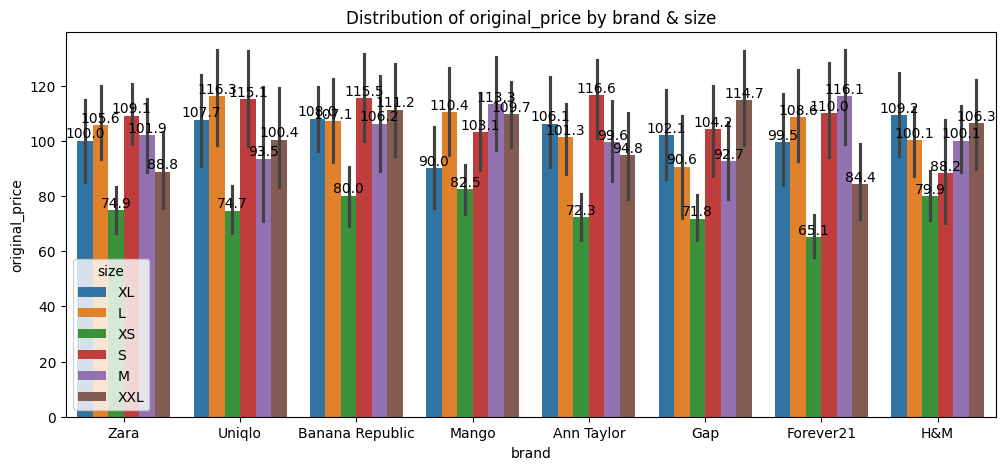

In [ ]:
plt.figure(figsize=(12,5))
bars5=sns.barplot(data=df2,x='brand',y='original_price',hue='size')
for container in bars5.containers:
 bars5.bar_label(container,fmt='%.1f')
plt.title('Distribution of original_price by brand & size')
plt.xlabel('brand')
plt.ylabel('original_price')
plt.legend(title='size',loc='lower left')
plt.show()

###**Interpretation:**
 **In this chart we can see the original price of brand & size.The price between 65 to below 120.Xs size has smallest price. XL range is 90 to 110.**

###**11.Distribution of customer_rating and brand**

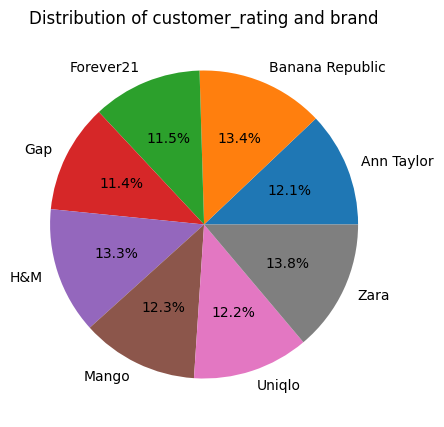

In [ ]:
pie=df2.groupby('brand')['customer_rating'].sum()
plt.figure(figsize=(5,5))
pie.plot(kind='pie',autopct='%1.1f%%')
plt.title('Distribution of customer_rating and brand')
plt.ylabel('')
plt.show()

###**Interpretation:**
 **In this chart we can see the customer rating of brand .All brand is above 11% rating of customer.Highest Distribution is Zara.**

###**12.Distribution of Customer Rating by Category**

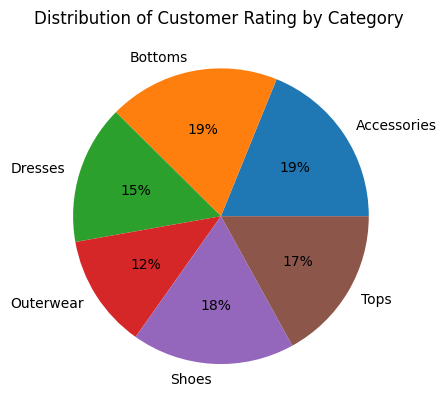

In [ ]:
gdata7=df2.groupby('category')['customer_rating'].sum().plot(kind='pie',autopct='%1.0f%%')
plt.title('Distribution of Customer Rating by Category ')
plt.ylabel('')
plt.show()

###**Interpretation:**
 **In this chart we can see distribution of customer rating by Category. Bottoms has highest percentage of rating.Outwear has lowest percentage of rating.**

###**13.Distribution of Customer Rating**

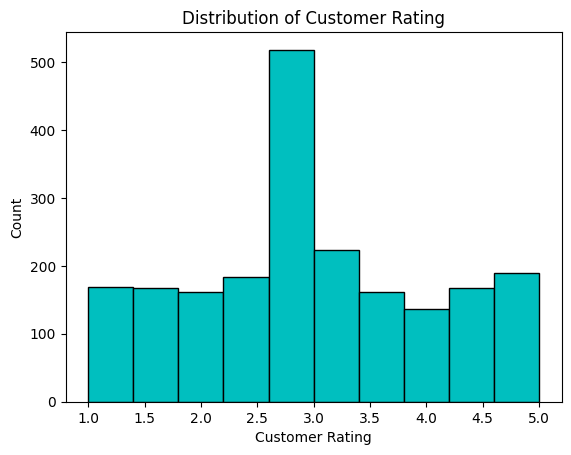

In [ ]:
plt.hist(df2['customer_rating'].sort_values(),bins=10,color='c',edgecolor='black')
plt.title('Distribution of Customer Rating')
plt.xlabel('Customer Rating')
plt.ylabel('Count')
plt.show()

###**Interpretation:**
 **In this chart we can see the highest count is 2.5 to 3.And 4.0 Rating has lowest count.**


###**14.Current price Distribution of Season & Purchase Date**

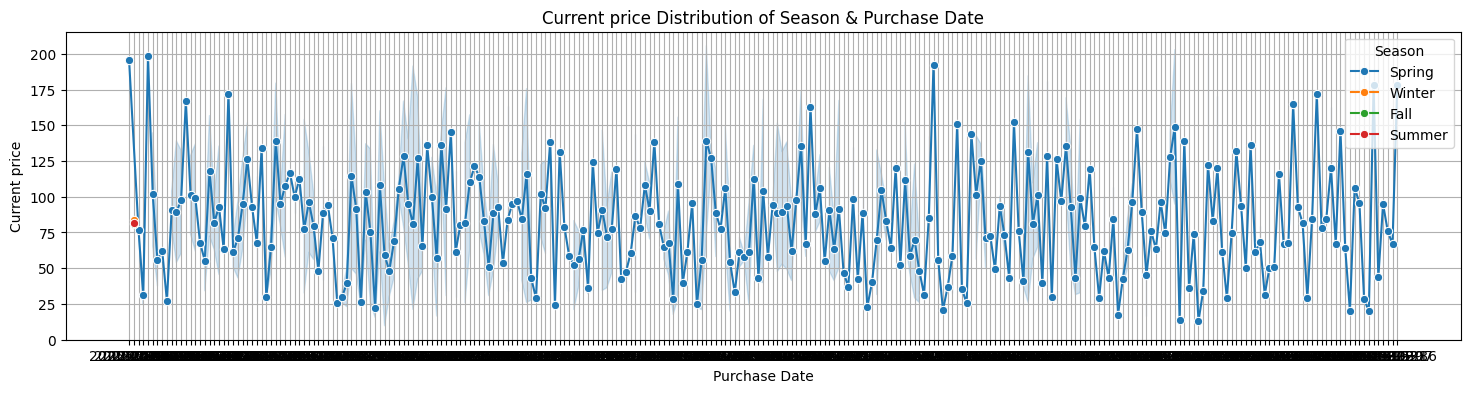

In [ ]:
plt.figure(figsize=(18,4))
sns.lineplot(data=df2,x='purchase_date',y='current_price',hue='season',marker='o')
plt.title('Current price Distribution of Season & Purchase Date')
plt.xlabel('Purchase Date')
plt.ylabel('Current price')
plt.legend(title='Season')
plt.grid(True)
plt.show()

###**Interpretation:**
**In this chart we can see all season distribution of current price .Mostly purchase in Spring Season.**

###**15.Customer Rating of Return Reason**

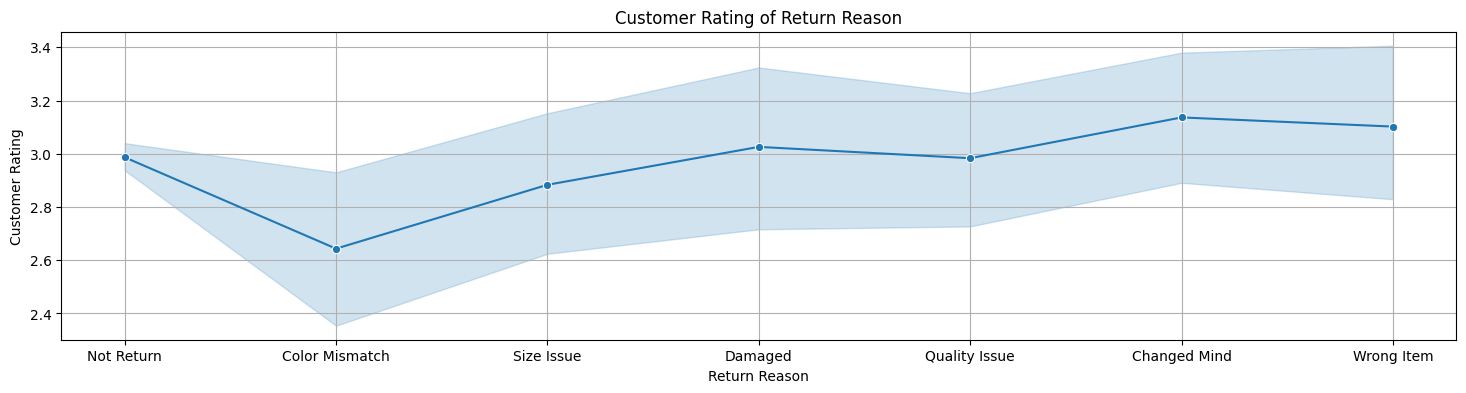

In [ ]:
plt.figure(figsize=(18,4))
sns.lineplot(data=df2,x='return_reason',y='customer_rating',marker='o')
plt.title('Customer Rating of Return Reason')
plt.xlabel('Return Reason')
plt.ylabel('Customer Rating')
plt.grid(True)
plt.show()

###**Interpreation:**
 **In this chart we ca see the rating of customer. Color Mismatch has lowest rating for return reason.All rating between 26 to 3.2 only.**

###**16.Customer Rating of Is Returned**

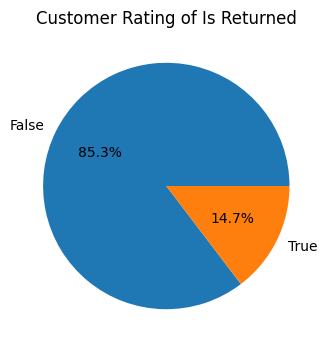

In [ ]:
pie1=df2.groupby('is_returned')['customer_rating'].sum()
plt.figure(figsize=(18,4))
pie1.plot(kind='pie',autopct='%1.1f%%')
plt.title('Customer Rating of Is Returned')
plt.ylabel('')
plt.show()


###**Interpretation:**
 **In this chart we can 85% of customer not return the product.Only 14% customer return.**

##**Feature Engineering:**
**Identify Categorical column and encode it.**

In [ ]:
df2.head()

,product_id,category,brand,season,size,color,original_price,markdown_percentage,current_price,purchase_date,stock_quantity,customer_rating,is_returned,return_reason
0,FB000001,Outerwear,Zara,Spring,XL,Red,196.01,0.0,196.01,2025-07-05,37,3.000000,False,Not Return
1,FB000002,Tops,Uniqlo,Winter,L,Pink,119.64,0.0,119.64,2025-08-06,2,2.500000,False,Not Return
2,FB000003,Accessories,Uniqlo,Winter,XS,Black,33.80,0.0,33.80,2025-08-06,22,4.300000,False,Not Return
3,FB000004,Shoes,Uniqlo,Spring,XL,Black,75.36,0.0,75.36,2025-07-07,48,2.600000,False,Not Return
4,FB000005,Tops,Banana Republic,Winter,XL,Black,105.02,0.0,105.02,2025-08-06,10,2.986604,False,Not Return


In [ ]:
car_col=['category','brand','season','size','color','is_returned']

**One Hot Encoding:**

In [ ]:
df_one=pd.get_dummies(df2.is_returned,prefix="Returned_")
df_one.head()

,Returned__False,Returned__True
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [ ]:
df_one=df_one.astype(int)
df_one.head()

,Returned__False,Returned__True
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
finaldf=pd.concat([df2,df_one],axis=1)
finaldf.head()

,product_id,category,brand,season,size,color,original_price,markdown_percentage,current_price,purchase_date,stock_quantity,customer_rating,is_returned,return_reason,Returned__False,Returned__True
0,FB000001,Outerwear,Zara,Spring,XL,Red,196.01,0.0,196.01,2025-07-05,37,3.000000,False,Not Return,1,0
1,FB000002,Tops,Uniqlo,Winter,L,Pink,119.64,0.0,119.64,2025-08-06,2,2.500000,False,Not Return,1,0
2,FB000003,Accessories,Uniqlo,Winter,XS,Black,33.80,0.0,33.80,2025-08-06,22,4.300000,False,Not Return,1,0
3,FB000004,Shoes,Uniqlo,Spring,XL,Black,75.36,0.0,75.36,2025-07-07,48,2.600000,False,Not Return,1,0
4,FB000005,Tops,Banana Republic,Winter,XL,Black,105.02,0.0,105.02,2025-08-06,10,2.986604,False,Not Return,1,0


**Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
car_col

['category', 'brand', 'season', 'size', 'color', 'is_returned']

In [ ]:
finaldf['category']=LabelEncoder().fit_transform(finaldf['category'])
label=LabelEncoder()
finaldf['brand']=label.fit_transform(finaldf['brand'])
finaldf['season']=label.fit_transform(finaldf['season'])
finaldf['size']=label.fit_transform(finaldf['size'])
finaldf['color']=label.fit_transform(finaldf['color'])
finaldf['is_returned']=label.fit_transform(finaldf['is_returned'])
finaldf.head()

,product_id,category,brand,season,size,color,original_price,markdown_percentage,current_price,purchase_date,stock_quantity,customer_rating,is_returned,return_reason,Returned__False,Returned__True
0,FB000001,3,7,1,3,9,196.01,0.0,196.01,2025-07-05,37,3.000000,0,Not Return,1,0
1,FB000002,5,6,3,0,7,119.64,0.0,119.64,2025-08-06,2,2.500000,0,Not Return,1,0
2,FB000003,0,6,3,4,1,33.80,0.0,33.80,2025-08-06,22,4.300000,0,Not Return,1,0
3,FB000004,4,6,1,3,1,75.36,0.0,75.36,2025-07-07,48,2.600000,0,Not Return,1,0
4,FB000005,5,1,3,3,1,105.02,0.0,105.02,2025-08-06,10,2.986604,0,Not Return,1,0


##**Feature Selection:**

In [ ]:
select_col=['category','brand',	'season',	'size','color',	'original_price',	'markdown_percentage','current_price']

In [ ]:
unwanted_col=['product_id','purchase_date','stock_quantity','customer_rating'	,'is_returned',	'return_reason','Returned__False','Returned__True']

In [ ]:
finaldf1=finaldf.drop(columns=['product_id','purchase_date','stock_quantity','customer_rating'	,'is_returned',	'return_reason','Returned__False','Returned__True'])

In [ ]:
finaldf1.head()

,category,brand,season,size,color,original_price,markdown_percentage,current_price
0,3,7,1,3,9,196.01,0.0,196.01
1,5,6,3,0,7,119.64,0.0,119.64
2,0,6,3,4,1,33.80,0.0,33.80
3,4,6,1,3,1,75.36,0.0,75.36
4,5,1,3,3,1,105.02,0.0,105.02


##**Split Data into Training and Testing:**

In [ ]:
X=finaldf1.drop(columns=['current_price'])
y=finaldf1['current_price']

In [ ]:
finaldf1.shape

(2079, 8)

In [ ]:
X.shape

(2079, 7)

In [ ]:
y.shape

(2079,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
finaldf1.shape

(2079, 8)

In [ ]:
X_train.shape

(1663, 7)

In [ ]:
X_test.shape

(416, 7)

In [ ]:
y_train.shape

(1663,)

In [ ]:
y_test.shape

(416,)

##**Feature Scalling:**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

##**Build the Machine Learning Model:**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error

In [ ]:
models={'Linear Regression':LinearRegression(),
         'Kneighbors Regression':KNeighborsRegressor(),
        'Decision Tree Regression':DecisionTreeRegressor(max_depth=5,random_state=42),
        'Random Forest Regression':RandomForestRegressor(n_estimators=100,max_depth=5,random_state=42),
        'Support Vector Regression':SVR(),
        'XGBoost Regression':XGBRegressor(n_estimators=100,learning_rate=0.1,eval_metric='logloss',random_state=42)
        }

In [ ]:
results=[]
for name, model in models.items():
  model.fit(X_train,y_train)
  Y_pred=model.predict(X_test)
  MAE=mean_absolute_error(y_test,Y_pred)
  MSE=mean_squared_error(y_test,Y_pred)
  R2=r2_score(y_test,Y_pred)
  RMSE=root_mean_squared_error(y_test,Y_pred)
  results.append({'Model':name,'MAE':MAE,'MSE':MSE,'R2 SCORE':R2,'RMSE':RMSE})


In [ ]:
Reg_df=pd.DataFrame(results).sort_values(by='R2 SCORE',ascending=False)
print(Reg_df)

                       Model       MAE         MSE  R2 SCORE       RMSE
5         XGBoost Regression  0.968770    3.893144  0.997997   1.973105
3   Random Forest Regression  2.744971   16.313553  0.991609   4.039004
2   Decision Tree Regression  4.940460   47.156019  0.975744   6.867024
0          Linear Regression  6.149417   85.375851  0.956085   9.239905
1      Kneighbors Regression  9.171096  133.841563  0.931156  11.568991
4  Support Vector Regression  7.709144  147.955978  0.923896  12.163716


###**Summary:**
  **The best model is: XGBoost**

  **Lowest MSE 3.899**

  **Here RMSE is 1.97 means the model has 1.97 price error.**

  **Highest R2 score is 0.99  this means te model has almost 99% Accurate.**
  
  **Highest R2 score & Lowest Mse is better model.**

In [ ]:
model.intercept_

array([82.54677], dtype=float32)

In [ ]:
y_test.head()

,current_price
1422,114.29
2100,81.20
633,55.52
31,28.30
445,58.56


In [ ]:
Y_pred

array([114.33826 ,  81.27851 ,  54.70361 ,  27.52619 ,  58.405052,
       126.863304, 134.23746 , 167.8718  ,  51.661865,  24.23535 ,
       177.84624 ,  52.907005,  48.876938,  22.98562 ,  34.169487,
        48.999798,  67.38039 ,  86.21966 ,  75.526054, 167.5256  ,
        61.66486 ,  47.655888,  62.39682 ,  77.50499 , 155.32326 ,
        42.303093,  65.20754 , 138.27452 , 155.20909 ,  45.919083,
        73.442764, 114.904755, 109.2707  ,  50.31984 ,  36.085125,
        67.76862 ,  51.805866,  63.780712,  87.83679 ,  80.323044,
        91.93792 ,  43.394745, 159.94403 , 100.83623 , 108.8104  ,
        97.404915, 103.01755 ,  73.44604 ,  29.40064 , 169.78806 ,
       155.51958 ,  70.809   , 140.31935 , 121.60569 ,  72.42132 ,
        72.05478 ,  80.354004, 142.65547 , 102.07436 ,  75.50305 ,
        94.56762 , 101.65741 ,  30.400917,  28.422401, 147.1829  ,
       114.79195 , 144.49303 ,  76.12218 ,  88.774635,  17.253601,
       160.42351 ,  77.98255 ,  26.382458,  26.448008,  39.886

In [ ]:
errors=y_test-Y_pred
errors

,current_price
1422,-0.048257
2100,-0.078511
633,0.816391
31,0.773810
445,0.154948
...,...
317,-0.632162
1726,-1.222706
747,0.992442
367,-0.027020


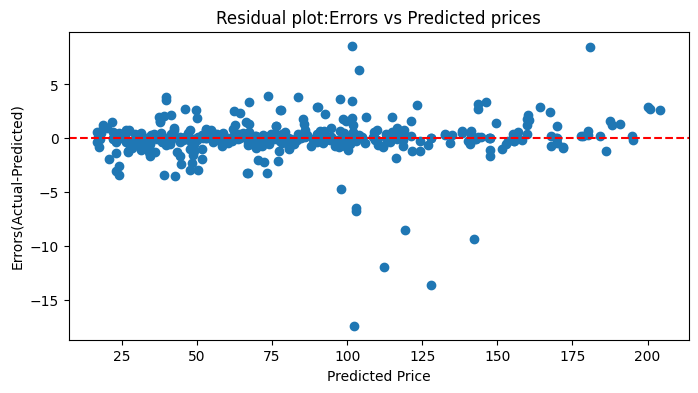

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(Y_pred,errors)
plt.axhline(y=0,color='r',linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Errors(Actual-Predicted)")
plt.title("Residual plot:Errors vs Predicted prices")
plt.show()

###**Interpretation:**
**Errors are randomly around with zero. some data points are under estimator & over estimators.**

##**Hyperparameter tuning: XGBoost**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid_reg={'n_estimators':[100,150,200],'max_depth':[4,5,6]}
grid_search_reg=GridSearchCV(XGBRegressor(random_state=42),param_grid_reg,cv=3,scoring='r2')
grid_search_reg.fit(X_train,y_train)
print("Best Parameters:",grid_search_reg.best_params_)
print("Best R2 Score:",grid_search_reg.best_score_)
best_xgb_reg=grid_search_reg.best_estimator_
best_pred_reg=best_xgb_reg.predict(X_test)
print("R2 Score (Tunned XGBoost):",grid_search_reg.best_score_)


Best Parameters: {'max_depth': 4, 'n_estimators': 200}
Best R2 Score: 0.9975440041105524
R2 Score (Tunned XGBoost): 0.9975440041105524


###**Observation:**
  **To try XGBoost Algorithm and get high R2 score is 0.99 & the best parameter is max_depth=4, n_estimators=200**

  **In this data set has high accurate. To predict the current price is mostly accutate.**